Решение задачи 2 по физико-химической гидрогеодинамике с помощью численного расчета преобразования Лапласа-Карсона

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats

In [40]:
bound = 0.08# g/l
x = 1.2 #meters
num_data_points = 16 # number of data points including initial conditions
time = [0,1,2,3,4,5,6,8,9,10,11,12,13,14, 15]
list1 = [11, 10.146,8.866,7.370,5.871,4.511,3.362,1.741,1.222,0.850,0.590,0.413,0.294,0.216, 0.08]
#data = np.array(list)
# Create DataFrame 
df = pd.DataFrame({'TimeDays': time, 'C, g/l':list1}) 
for i in range(17,1000):
#    print(i)
    df.loc[i] = [i,0.08]
df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())
# Print the output. 
df 


,TimeDays,"C, g/l",c^
0,0.0,11.000,-0.000000
1,1.0,10.146,0.078205
2,2.0,8.866,0.195421
3,3.0,7.370,0.332418
4,4.0,5.871,0.469689
...,...,...,...
995,995.0,0.080,1.000000
996,996.0,0.080,1.000000
997,997.0,0.080,1.000000
998,998.0,0.080,1.000000


Text(0, 0.5, 'Концентрация, [-]')

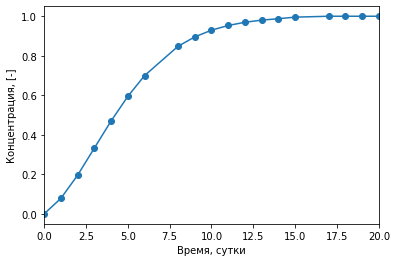

In [41]:
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['c^'], 'o-')
ax.set_xlabel('Время, сутки')
ax.set_xlim(0,20)
ax.set_ylabel('Концентрация, [-]')

In [50]:
s = 10# number of p
power = 1/(s-1)
q = pow(((14/20)*(5/14)), power)
q = round(q,2)
t_C_max = 16# time of max concentration
tmax = t_C_max/5
tmax = round(tmax,2)

t = [tmax  *q**i for i in range(s)]
t_rounded = [round(num, 1) for num in t]
p = [1/i for i in t]
p
#p = [0.5,0.55,0.6,0.8]
#p = [1/7,0.2,0.3,0.8]
#for x in p:
#    print(x)
#p = [0.357,0.556,1,1.429] 

[0.3125,
 0.3633720930232558,
 0.4225256895619254,
 0.491308941351076,
 0.5712894666872977,
 0.6642900775433694,
 0.7724303227248482,
 0.8981747938661025,
 1.0443892951931424,
 1.2144061572013285]

In [51]:
tmax

3.2

exponent = 0      -0.000000e+00
1       5.721609e-02
2       1.046015e-01
3       1.301766e-01
4       1.345680e-01
           ...      
995    9.152917e-136
996    6.696417e-136
997    4.899204e-136
998    3.584334e-136
999    2.622355e-136
Name: laplace, Length: 998, dtype: float64
p = 0.3125 int = 0.32136132003873374
exponent = 0      -0.000000e+00
1       5.437819e-02
2       9.448237e-02
3       1.117513e-01
4       1.097913e-01
           ...      
995    9.518261e-158
996    6.618310e-158
997    4.601894e-158
998    3.199824e-158
999    2.224926e-158
Name: laplace, Length: 998, dtype: float64
p = 0.3633720930232558 int = 0.28073795448610067
exponent = 0      -0.000000e+00
1       5.125481e-02
2       8.394032e-02
3       9.357983e-02
4       8.665782e-02
           ...      
995    2.611725e-183
996    1.711697e-183
997    1.121828e-183
998    7.352342e-184
999    4.818647e-184
Name: laplace, Length: 998, dtype: float64
p = 0.4225256895619254 int = 0.2427165486025962
exponent = 

[0, 20, 0, 0.1]

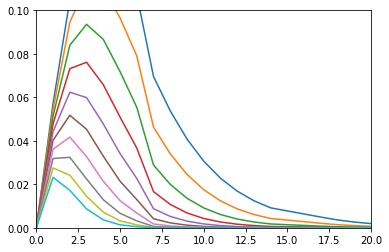

In [52]:
integrated = []
for count in p:
    exp_ = np.exp((-count)*df['TimeDays'])
    df['laplace'] = df['c^']*exp_
    print('exponent = ' + str(df['laplace']))
    plt.plot(df['laplace'])
    
    #df
    #s = df.apply(lambda g: integrate.trapz(df['laplace'], x=df['TimeDays']))
    s = integrate.trapz(df['laplace'], x=df['TimeDays'])
#    s = integrate.simps(df['laplace'], x=df['TimeDays'], even='avg')
    s = s*count
    integrated.append(s)
    print('p = ' +str(count) +' int = '+ str(s))
integrated
plt.axis([0, 20, 0, 0.1])

In [53]:
df_final = pd.DataFrame({'p, days^-1':p, 'U^':integrated}) 
df_final

,"p, days^-1",U^
0,0.312500,0.321361
1,0.363372,0.280738
2,0.422526,0.242717
3,0.491309,0.207710
4,0.571289,0.175984
5,0.664290,0.147661
6,0.772430,0.122737
7,0.898175,0.101097
8,1.044389,0.082534
9,1.214406,0.066767


In [54]:
df_final['a,m-1'] = -1/1.2*np.log(df_final['U^'])
df_final['p/a'] =df_final['p, days^-1']/df_final['a,m-1'] 
df_final

,"p, days^-1",U^,"a,m-1",p/a
0,0.312500,0.321361,0.945991,0.330341
1,0.363372,0.280738,1.058611,0.343254
2,0.422526,0.242717,1.179884,0.358108
3,0.491309,0.207710,1.309677,0.375138
4,0.571289,0.175984,1.447802,0.394591
5,0.664290,0.147661,1.594029,0.416737
6,0.772430,0.122737,1.748093,0.441870
7,0.898175,0.101097,1.909729,0.470315
8,1.044389,0.082534,2.078785,0.502404
9,1.214406,0.066767,2.255452,0.538431


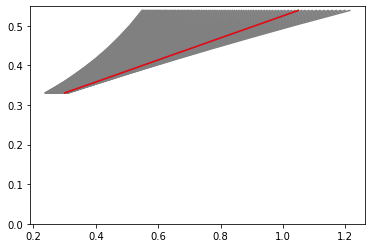

In [55]:
r2 = []
listofslopes = []
listofintercepts = []
fig, ax1= plt.subplots()
A3 = np.linspace(0,1,101)
df_results = pd.DataFrame({'A3': A3 , 'R2':''}) 
for count1 in A3:
    df_final['result'] = (df_final['p, days^-1'].round(3)/(1+count1*df_final['p, days^-1'].round(3))).round(3)
    df_final['result'] = df_final['result'].round(3)
    ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'gray')
    slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'])
    r2.append(r_value**2)
    listofintercepts.append(intercept)
    listofslopes.append(slope)
df_results['R2'] = r2
df_results['slope'] = listofslopes
df_results['intercept'] = listofintercepts
df_results
slope1 = df_results['slope'].loc[df_results['R2'].idxmax()]
intercept1 = df_results['intercept'].loc[df_results['R2'].idxmax()]
ax1.plot((df_final['p/a']-intercept1)/slope1,df_final['p/a'])
#intercepty = slope1*0+intercept1
ax1.set_ylim(bottom = 0)
A3_res = df_results['A3'].loc[df_results['R2'].idxmax()]
df_final['result'] = df_final['p, days^-1']/(1+A3_res*df_final['p, days^-1'])
df_final['result'] = df_final['result'].round(3)
ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'red')

In [56]:
df_results.loc[df_results['R2'].idxmax()]

A3           0.130000
R2           0.999998
slope        0.278092
intercept    0.246732
Name: 13, dtype: float64

In [57]:
df_final['result'] = df_final['p, days^-1'].round(3)/(1+0.2*df_final['p, days^-1'].round(3))
#df_final['result'] = df_final['result'].round(3)
#slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'].round(3))
df_final['result']
#A3_res = 0.05
#r_value**2

0    0.293675
1    0.338430
2    0.390006
3    0.447095
4    0.512475
5    0.586158
6    0.668746
7    0.761275
8    0.863666
9    0.976827
Name: result, dtype: float64

In [58]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.40529841399488925
k = 0.07859776066673914
alpha = 0.22578286941894624


In [401]:
round(0.342334, 2)

0.34

In [451]:
pd.set_option('display.max_rows', 101)
df_results


,A3,R2,slope,intercept
0,0.00,0.998917,0.236728,0.264186
1,0.01,0.999101,0.240934,0.262633
2,0.02,0.999308,0.245081,0.261188
3,0.03,0.999444,0.249378,0.259596
4,0.04,0.999558,0.253849,0.257931
5,0.05,0.999672,0.258039,0.256476
6,0.06,0.999737,0.262304,0.254988
7,0.07,0.999850,0.266639,0.253539
8,0.08,0.999891,0.270854,0.252169
9,0.09,0.999944,0.275480,0.250450


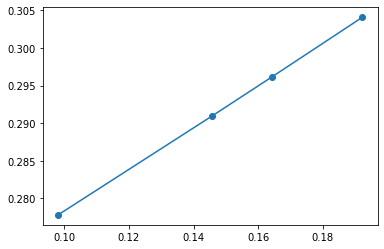

In [333]:
plt.plot(df_final['result'],df_final['p/a'],'o-')

In [182]:
pd.set_option('display.max_rows', 10)
df_results

,A3,R2,slope,intercept
0,0.00,0.998985,0.229330,0.264623
1,0.01,0.999140,0.233496,0.263126
2,0.02,0.999317,0.237645,0.261775
3,0.03,0.999466,0.241834,0.260282
4,0.04,0.999576,0.245938,0.258862
...,...,...,...,...
96,0.96,0.985923,0.727800,0.139453
97,0.97,0.985862,0.731430,0.139336
98,0.98,0.985415,0.738434,0.137963
99,0.99,0.985373,0.744908,0.136290


In [206]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.401058254853647
k = 0.06667859929491535
alpha = 0.24958883388974262


In [332]:
0.0868526565612364*(1-0.0868526565612364)*0.4485852957692019/A3_res

0.1111780422211543

In [205]:
df_final['p/a'] = [0.344,0.398,0.513,]

In [206]:
df_final['p/a']

0    0.344
1    0.398
2    0.513
3    0.622
Name: p/a, dtype: float64

In [ ]:
n = 0.4036690021448831
k = 0.07427333511390906
alpha = 0.23129159661357615